### Student Information
Name: Ting-Wei, Liu 劉庭維

Student ID: 106062513

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import os
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

### Data Preparation


In [3]:
data_dir = 'sentiment labelled sentences'
amazon_data_path = 'amazon_cells_labelled.txt'
imdb_data_path = 'imdb_labelled.txt'
yelp_data_path = 'yelp_labelled.txt' 
amazon_data = pd.read_csv(os.path.join(data_dir, amazon_data_path), sep='\t', header=None, names=['sentence', 'label'])
amazon_data['category'] = 'Amazon'
imdb_data = pd.read_csv(os.path.join(data_dir, imdb_data_path), sep='\t', header=None, names=['sentence', 'label'])
imdb_data['category'] = 'Imdb'
yelp_data = pd.read_csv(os.path.join(data_dir, yelp_data_path), sep='\t', header=None, names=['sentence', 'label'])
yelp_data['category'] = 'Yelp'
X = pd.concat([amazon_data, imdb_data, yelp_data])

In [4]:
len(X)

2748

In [5]:
X[0:10]

,sentence,label,category
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
5,I have to jiggle the plug to get it to line up...,0,Amazon
6,If you have several dozen or several hundred c...,0,Amazon
7,If you are Razr owner...you must have this!,1,Amazon
8,"Needless to say, I wasted my money.",0,Amazon
9,What a waste of money and time!.,0,Amazon


In [6]:
X.iloc[::10, :][0:10]

,sentence,label,category
0,So there is no way for me to plug it in here i...,0,Amazon
10,And the sound quality is great.,1,Amazon
20,I went on Motorola's website and followed all ...,0,Amazon
30,"This is a simple little phone to use, but the ...",0,Amazon
40,"It has a great camera thats 2MP, and the pics ...",1,Amazon
50,Not loud enough and doesn't turn on like it sh...,0,Amazon
60,Essentially you can forget Microsoft's tech su...,0,Amazon
70,Mic Doesn't work.,0,Amazon
80,I wear it everyday and it holds up very well.,1,Amazon
90,For a product that costs as much as this one d...,0,Amazon


#### Exercise 0

In [7]:
X.query('label==1 and category=="Yelp"')[0:10]

,sentence,label,category
0,Wow... Loved this place.,1,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp
8,The fries were great too.,1,Yelp
9,A great touch.,1,Yelp
10,Service was very prompt.,1,Yelp
13,"I tried the Cape Cod ravoli, chicken,with cran...",1,Yelp
16,Highly recommended.,1,Yelp
21,"The food, amazing.",1,Yelp
22,Service is also cute.,1,Yelp


In [8]:
X.loc[(X.label==1) & (X.category=='Yelp')][0:10]

,sentence,label,category
0,Wow... Loved this place.,1,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp
8,The fries were great too.,1,Yelp
9,A great touch.,1,Yelp
10,Service was very prompt.,1,Yelp
13,"I tried the Cape Cod ravoli, chicken,with cran...",1,Yelp
16,Highly recommended.,1,Yelp
21,"The food, amazing.",1,Yelp
22,Service is also cute.,1,Yelp


### Missing Values

In [9]:
X.isnull()

,sentence,label,category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [10]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object

#### Exercise 1

In [11]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [12]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "label"])

In [13]:
dummy_series

sentence    dummy_record
label                  1
dtype: object

In [14]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [15]:
len(result_with_series)

2749

In [16]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 1)
dtype: object

In [17]:
dummy_dict = [{'sentence': 'dummy_record',
               'label': 1
              }]
X = X.append(dummy_dict,ignore_index=True)
len(X)

2749

In [18]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 1)
dtype: object

In [19]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
category    (The amoung of missing records is: , 0)
dtype: object

In [20]:
len(X)

2748

### Duplicate Data

In [21]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2718    False
2719    False
2720    False
2721    False
2722    False
2723    False
2724    False
2725    False
2726    False
2727    False
2728    False
2729    False
2730    False
2731    False
2732    False
2733    False
2734    False
2735    False
2736    False
2737    False
2738    False
2739    False
2740    False
2741    False
2742    False
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [22]:
sum(X.duplicated())

17

In [23]:
sum(X.duplicated('sentence'))

17

In [24]:
sum(X.duplicated('category'))

2745

In [25]:
X.drop_duplicates(keep='first', inplace=True)
len(X)

2731

### Sampling

In [26]:
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [27]:
X_sample[0:4]

,sentence,label,category
347,Good audio quality.,1,Amazon
2147,Cooked to perfection and the service was impec...,1,Yelp
1631,Trumbull on I LOVE LUCY).,1,Imdb
909,Seller shipped quickly and much cheaper than t...,1,Amazon


In [28]:
X_category_counts = ta.get_tokens_and_frequency(list(X.category))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.category))

In [29]:
offline.init_notebook_mode(connected=True)
offline.iplot(ta.plot_word_frequency(X_category_counts, "Category distribution"))

In [30]:
offline.iplot(ta.plot_word_frequency(X_category_counts, "Category distribution"))

In [31]:
offline.iplot(ta.plot_word_frequency(X_sample_category_counts, "Category distribution"))

In [32]:
trace1 = {
    "x":list(X_category_counts[0]),
    "y":list(X_category_counts[1]),
    "type": "bar"
}
trace2 = {
    "x":list(X_sample_category_counts[0]),
    "y":list(X_sample_category_counts[1]),
    "type": "bar"
}

data = go.Data([trace1, trace2])
layout = {
    "title": "Category distribution",
    "yaxis": {"title": "Frequency"}
}

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='grouped-bar')

In [33]:
X_category_counts

(odict_keys(['Yelp', 'Amazon', 'Imdb']), odict_values([996, 990, 745]))

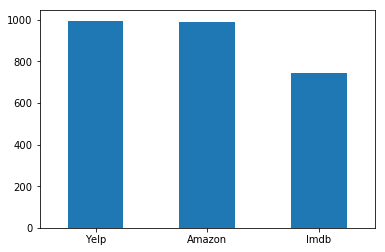

In [34]:
X.category.value_counts().plot(kind="bar", rot=0)

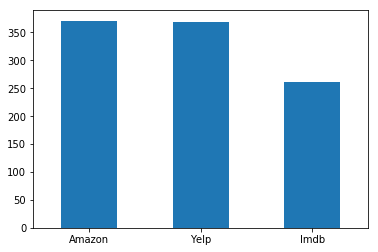

In [35]:
X_sample.category.value_counts().plot(kind="bar", rot=0)

### Feature Creation

In [36]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [37]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [38]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature subset selection

In [39]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [40]:
X_counts

<2731x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 30212 stored elements in Compressed Sparse Row format>

In [41]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[0:5].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter',
 'good',
 'case',
 'excellent',
 'value',
 'great',
 'for',
 'the',
 'jawbone',
 'tied',
 'to',
 'charger',
 'for',
 'conversations',
 'lasting',
 'more',
 'than',
 '45',
 'minutes',
 'major',
 'problems',
 'the',
 'mic',
 'is',
 'great']

In [42]:
" ".join(list(X[0:5].sentence))

'So there is no way for me to plug it in here in the US unless I go by a converter. Good case, Excellent value. Great for the jawbone. Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! The mic is great.'

In [43]:
X_counts.shape


(2731, 5155)

In [44]:
count_vect.get_feature_names()[-2:-1]


['zombie']

In [45]:
X[0:5]

,sentence,label,category,unigrams
0,So there is no way for me to plug it in here i...,0,Amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Amazon,"[The, mic, is, great, .]"


In [46]:
X_counts[0:5,0:100].toarray()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [47]:
count_vect.transform(['Something completely new.']).toarray()


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
count_vect.transform(['00 Something completely new. zombie']).toarray()


array([[1, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [49]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [50]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [51]:
plot_y = ["sentence_"+ str(i) for i in X.index[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
offline.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

#### Exercise 3

In [52]:
X_sample = X.sample(n=100)
X_sample_counts = count_vect.fit_transform(X_sample.sentence)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]]
plot_z = X_sample_counts[0:, 0:].toarray()
offline.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))


### Dimensionality Reduction


In [53]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced.shape

(2731, 3)

In [54]:
trace1 = ta.get_trace(X_reduced, X["category"], "Amazon", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["category"], "Imdb", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced, X["category"], "Yelp", "rgb(229,65,136)")
data = [trace1, trace2, trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='simple-3d-scatter')

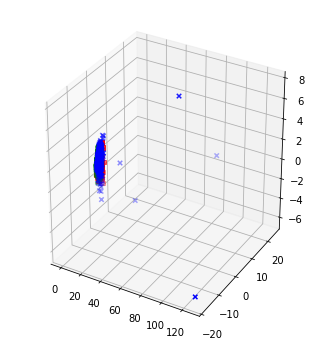

In [55]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(12,6))

plt3 = fig.add_subplot(1,2,2, projection='3d')
for l, c, m in zip(np.unique(X.category), colors, markers):
    plt3.scatter(xs=X_reduced[X.category==l, 0],
                   ys=X_reduced[X.category==l, 1],
                   zs=X_reduced[X.category==l, 2],
                   c=c, label=l, marker=m)

### Aggregation

In [56]:
term_frequencies = []
for j in range(0,X_sample_counts.shape[1]):
    term_frequencies.append(sum(X_sample_counts[:,j].toarray())[0])

In [57]:
len(term_frequencies)

496

### Exercise 4

In [58]:
offline.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))


### Exercise 5

In [59]:
tf_list, name_list = zip(*sorted(zip(term_frequencies, count_vect.get_feature_names()), reverse=True))

In [60]:
offline.iplot(ta.plot_word_frequency([name_list, tf_list], "Term Frequency Distribution"))


In [61]:
term_frequencies_log = [math.log(i) for i in tf_list]
offline.iplot(ta.plot_word_frequency([name_list, term_frequencies_log], "Term Frequency Distribution"))


### Discretization and Binarization

In [62]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_


array(['Amazon', 'Imdb', 'Yelp'],
      dtype='<U6')

In [63]:
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]


,sentence,label,category,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,Amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,Amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,Amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,Amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,Amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,Amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,Amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,Amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,Amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


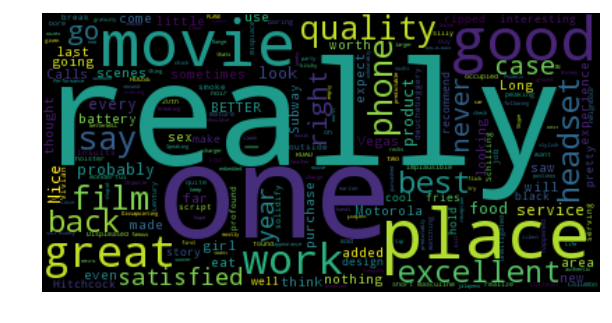

In [64]:
#sample data
text = ''.join(X_sample.sentence)
ta.plot_word_cloud(text)

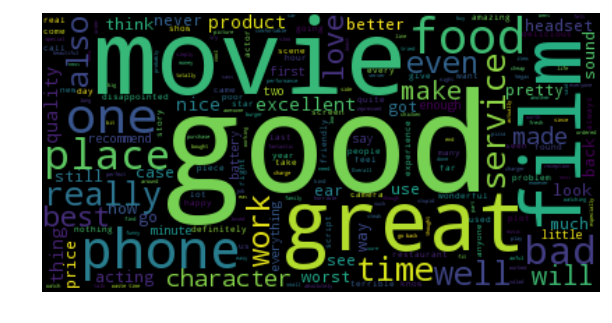

In [65]:
#all data
text = ''.join(X.sentence)
ta.plot_word_cloud(text)

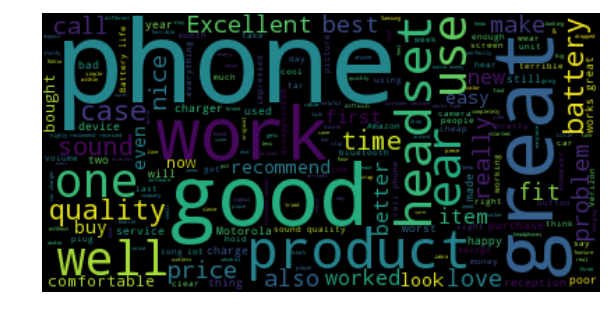

In [66]:
#amazon
text = ''.join(X.sentence[X.category=='Amazon'])
ta.plot_word_cloud(text)

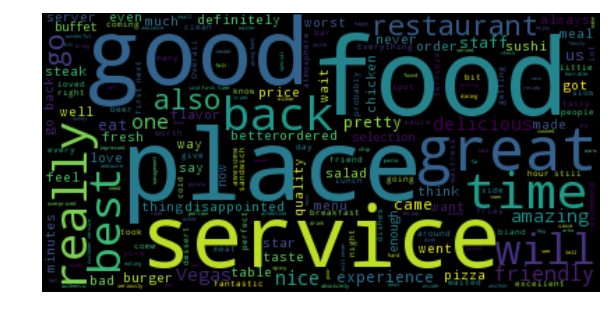

In [67]:
#yelp
text = ''.join(X.sentence[X.category=='Yelp'])
ta.plot_word_cloud(text)

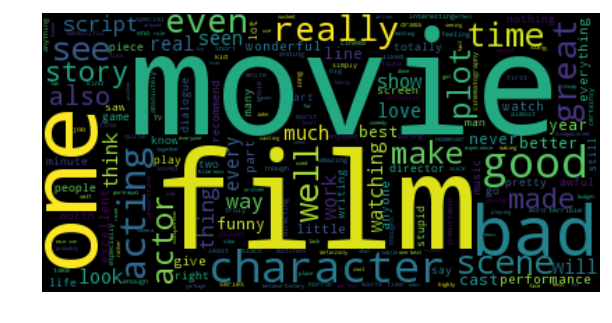

In [68]:
#imdb
text = ''.join(X.sentence[X.category=='Imdb'])
ta.plot_word_cloud(text)

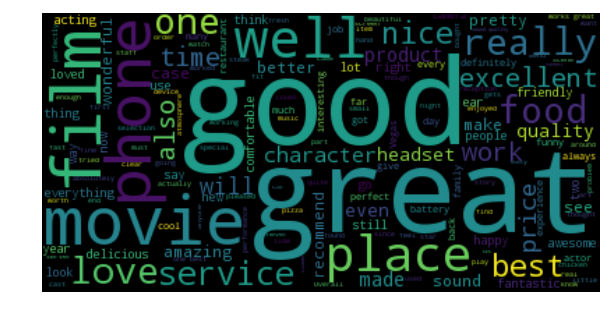

In [69]:
#positive
text = ''.join(X.sentence[X.label==1])
ta.plot_word_cloud(text)

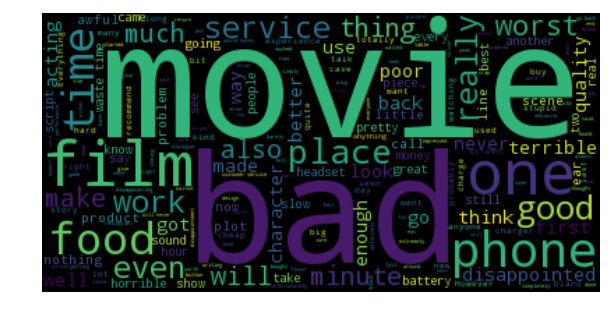

In [70]:
#negative
text = ''.join(X.sentence[X.label==0])
ta.plot_word_cloud(text)

In [71]:
positive_text = ' '.join(X.sentence[X.label==1])
negative_text = ' '.join(X.sentence[X.label==0])

In [72]:
positive_text[0:100]

'Good case, Excellent value. Great for the jawbone. The mic is great. If you are Razr owner...you mus'

In [73]:
# tokenize
def word_count(text):
    from nltk.tokenize import word_tokenize
    wordlist = [word.lower() for word in word_tokenize(text)]

    # filter stopword and punctuation
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    english_punctuations = [',', '.', ':', ';', '$', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '-', '%', '...']
    filtered_words = [word for word in wordlist if word not in stop and word not in english_punctuations]
    #word count
    tf = [filtered_words.count(word) for word in filtered_words]
    word_counts = dict(zip(filtered_words, tf))
    return word_counts

In [74]:
positive_word_count = word_count(positive_text)
negative_word_count = word_count(negative_text)
# subtract common words freq 
for word in negative_word_count.keys():
    if word in positive_word_count:
        positive_word_count[word] -= negative_word_count[word]
    else:
        positive_word_count[word] = -negative_word_count[word]

word_count = {k: v for k, v in positive_word_count.items() if v > 3 or v < -3}
tuples = list(word_count.items())
sorted_tuples= sorted(tuples, key=lambda tup: tup[1], reverse=True)
name, tf = zip(*sorted_tuples)
offline.iplot(ta.plot_word_frequency([name, tf], "Term Frequency Distribution"))


In [75]:
name[0:10]

('great',
 'good',
 'nice',
 'works',
 'excellent',
 'best',
 'love',
 'well',
 "'s",
 'amazing')

In [76]:
name[-10:]

('terrible',
 'poor',
 'money',
 'waste',
 'would',
 'worst',
 '0',
 '1',
 'bad',
 "n't")